# Temat testów:
### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od trudności? (grupy: wszystkie grafiki, grafiki A, grafiki B, grafiki 1,2,3)

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr', '1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud', 'Wynik', 'Trud_all']
)
df_answers.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Wynik,1a_corr,1b_corr,2a_corr,2b_corr,3a_corr,3b_corr
0,1,3,1,4,3,4,4,19,4,1,1,0,0,1,1
1,2,1,2,3,1,2,4,13,5,1,1,1,1,0,1
2,3,2,1,3,1,1,1,9,4,1,1,1,1,0,0
3,4,3,2,2,1,3,5,16,5,1,1,1,1,1,0
4,5,4,2,3,2,3,3,17,6,1,1,1,1,1,1


Do wniosków ogólnych (trud_popr_mean_max_min.csv):
- mean, min, max - trudność zadań
- mean - poprawność

In [15]:
result_df = pd.DataFrame({
    'mean': df_answers.mean(),
    'max': df_answers.max(),
    'min': df_answers.min()
})

result_df.to_csv('../results/tables/trud_popr_mean_max_min.csv', index=True)

Funkcje:

In [16]:
def prepate_set(list_of_cols_trud, list_of_cols_popr):
    new_row_trud = list_of_cols_trud[0]
    for i in list_of_cols_trud[1:]:
        new_row_trud = pd.concat([new_row_trud, i], ignore_index=True)

    new_row_popr = list_of_cols_popr[0]
    for i in list_of_cols_popr[1:]:
        new_row_popr = pd.concat([new_row_popr, i], ignore_index=True)

    return pd.DataFrame({'poprawnosc': new_row_popr, 'trudnosc': new_row_trud})

In [17]:
def create_contingency_table(df):
    return pd.crosstab(df['poprawnosc'], df['trudnosc'])

In [18]:
def corr_answer_index(contingency_table):
    wskaznik = []
    trudnosc = []
    for i in contingency_table.columns.tolist():
        popr =  contingency_table.loc[1, i]
        niepopr = contingency_table.loc[0, i]
        if popr != 0:
            wsk = (popr - niepopr) / popr
        else:
            continue
        wskaznik.append(wsk)
        trudnosc.append(i)
        print(f"Trudność: {i}, Wskaźnik: {wsk}")
        
    plt.bar(trudnosc, wskaznik, color='skyblue')
    plt.xlabel('Ocena trudności zadania')
    plt.ylabel('$\\frac{poprawne-niepoprawne}{poprawne}$')
    plt.title('Przewaga poprawnych odpowiedzi nad niepoprawnymi\nw zależności od oceny trudności zadania')
    plt.grid()

    # Regresja
    coefficients = np.polyfit(trudnosc, wskaznik, 1)
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(min(trudnosc), max(trudnosc), 100)
    plt.plot(x_axis, polynomial(x_axis), color='red', label='Regresja liniowa')

    # Średnia
    srednia = np.linspace(np.mean(wskaznik), np.mean(wskaznik), 100)
    plt.plot(x_axis, srednia, color='green', linestyle='dotted', label='Średnia')

    plt.legend()
    plt.show()

In [19]:
def make_decision(p_val, alpha, H0, H1):
    if p_val < alpha:
        print('Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1:')
        print(H1)
    else:
        print('Brak podstaw do odrzucenia H0.')
        print(H0)

In [20]:
def conduct_chi2test(contingency_table, h0, h1, alpha):
    chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

    print('Wartość statystyki chi-kwadrat:', chi2_stat)
    print('P-value:', p_val)
    make_decision(p_val, alpha, h0, h1)

### TESTY

**H0:** Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.
**H1:** Istnieje istotna statystycznie zależność między poziomem trudności a poprawnością odpowiedzi.
**Poziom istotności:** $\alpha=0.05$

Mamy dwie zmienne kategoryczne (dyskretne):
- poprawność $ \text{{0,1}} $
- trudność ${1,2,3,4,5}$

Stąd wykonujemy test chi-kwadrat.

In [21]:
h0 = 'Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.'
h1 = 'Istnieje istotna statystycznie zależność między poziomem trudności a poprawnością odpowiedzi.'
alpha = 0.05

a) wszystkie grafiki

In [22]:
trud = []
for col in df_answers.columns.tolist():
    if col.endswith('trud'):
        trud.append(df_answers[col])

popr = []
for col in df_answers.columns.tolist():
    if col.endswith('corr'):
        popr.append(df_answers[col])
        
df = prepate_set(trud, popr)

contingency_table = create_contingency_table(df)
contingency_table

trudnosc,1,2,3,4,5
poprawnosc,,,,,
0,12,24,19,13,4
1,40,60,44,25,5


Trudność: 1, Wskaźnik: 0.7
Trudność: 2, Wskaźnik: 0.6
Trudność: 3, Wskaźnik: 0.5681818181818182
Trudność: 4, Wskaźnik: 0.48
Trudność: 5, Wskaźnik: 0.2


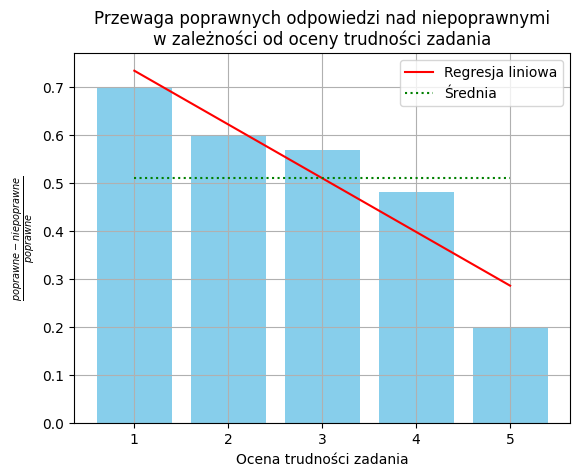

In [23]:
corr_answer_index(contingency_table)

Stosunek $\frac{poprawneOdp - niepoprawneOdp}{poprawneOdp}$ zmniejsza się wraz ze wzrostem trudności (im wskaźnik jest mniejszy, tym większa jest równowaga poprawnych i niepoprawnych odpowiedzi, duża wartość wskaźnika pokazuje jak silna jest dominacja poprawnych odpowiedzi nad niepoprawnymi)

**Wniosek:** wraz ze wzrostem trudności zadania malała przewaga poprawnych odpowiedzi

In [24]:
conduct_chi2test(contingency_table, h0, h1, alpha)

Wartość statystyki chi-kwadrat: 2.456326584956349
P-value: 0.6524728942415814
Brak podstaw do odrzucenia H0.
Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.


b) grafiki A

In [25]:
trud = [df_answers['1a_trud'], df_answers['2a_trud'], df_answers['3a_trud']]
popr = [df_answers['1a_corr'], df_answers['2a_corr'], df_answers['3a_corr']]

df = prepate_set(trud, popr)

contingency_table = create_contingency_table(df)
contingency_table

trudnosc,1,2,3,4,5
poprawnosc,,,,,
0,7,13,7,8,1
1,15,30,28,12,2


Trudność: 1, Wskaźnik: 0.5333333333333333
Trudność: 2, Wskaźnik: 0.5666666666666667
Trudność: 3, Wskaźnik: 0.75
Trudność: 4, Wskaźnik: 0.3333333333333333
Trudność: 5, Wskaźnik: 0.5


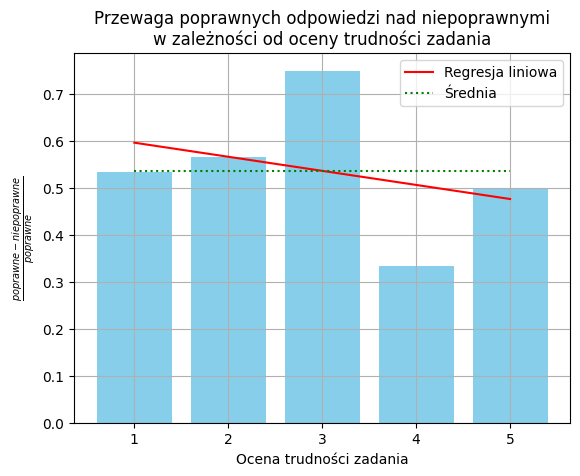

In [26]:
corr_answer_index(contingency_table)

In [27]:
conduct_chi2test(contingency_table, h0, h1, alpha)

Wartość statystyki chi-kwadrat: 2.6772980405498448
P-value: 0.6131929682247401
Brak podstaw do odrzucenia H0.
Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.


c) grafiki B

In [28]:
trud = [df_answers['1b_trud'], df_answers['2b_trud'], df_answers['3b_trud']]
popr = [df_answers['1b_corr'], df_answers['2b_corr'], df_answers['3b_corr']]
df = prepate_set(trud, popr)

contingency_table = create_contingency_table(df)
contingency_table

trudnosc,1,2,3,4,5
poprawnosc,,,,,
0,5,11,12,5,3
1,25,30,16,13,3


Trudność: 1, Wskaźnik: 0.8
Trudność: 2, Wskaźnik: 0.6333333333333333
Trudność: 3, Wskaźnik: 0.25
Trudność: 4, Wskaźnik: 0.6153846153846154
Trudność: 5, Wskaźnik: 0.0


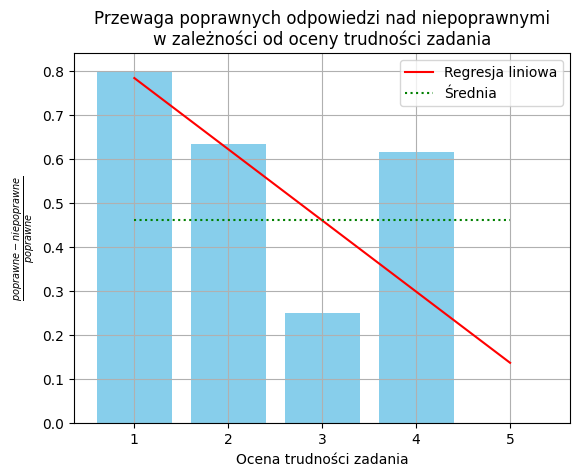

In [29]:
corr_answer_index(contingency_table)

In [30]:
conduct_chi2test(contingency_table, h0, h1, alpha)

Wartość statystyki chi-kwadrat: 6.181604634190842
P-value: 0.1859902175015663
Brak podstaw do odrzucenia H0.
Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.


d) grafiki 1,2,3

-> 1

In [31]:
trud = [df_answers['1a_trud'], df_answers['1b_trud']]
popr = [df_answers['1a_corr'], df_answers['1b_corr']]

df = prepate_set(trud, popr)

contingency_table = create_contingency_table(df)
contingency_table

trudnosc,1,2,3,4,5
poprawnosc,,,,,
0,2,4,2,0,0
1,18,29,20,6,1


Trudność: 1, Wskaźnik: 0.8888888888888888
Trudność: 2, Wskaźnik: 0.8620689655172413
Trudność: 3, Wskaźnik: 0.9
Trudność: 4, Wskaźnik: 1.0
Trudność: 5, Wskaźnik: 1.0


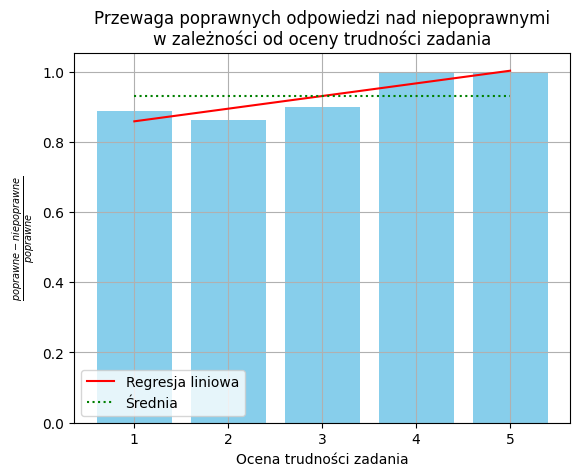

In [32]:
corr_answer_index(contingency_table)

In [33]:
conduct_chi2test(contingency_table, h0, h1, alpha)

Wartość statystyki chi-kwadrat: 0.9788288288288287
P-value: 0.9129890588754646
Brak podstaw do odrzucenia H0.
Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.


-> 2

In [34]:
trud = [df_answers['2a_trud'], df_answers['2b_trud']]
popr = [df_answers['2a_corr'], df_answers['2b_corr']]

df = prepate_set(trud, popr)

contingency_table = create_contingency_table(df)
contingency_table

trudnosc,1,2,3,4,5
poprawnosc,,,,,
0,0,7,7,7,2
1,21,24,11,3,0


Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.7083333333333334
Trudność: 3, Wskaźnik: 0.36363636363636365
Trudność: 4, Wskaźnik: -1.3333333333333333


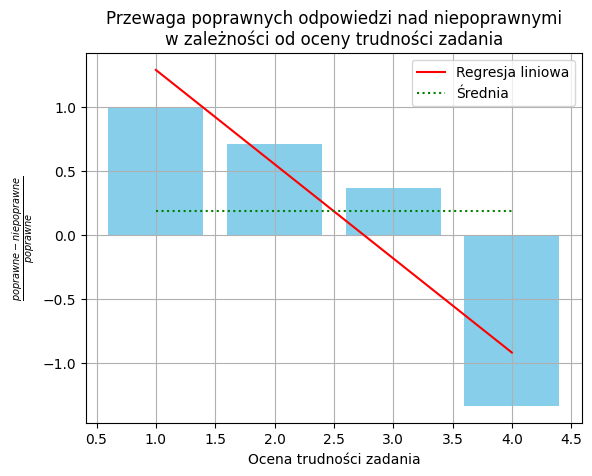

In [35]:
corr_answer_index(contingency_table)

In [36]:
conduct_chi2test(contingency_table, h0, h1, alpha)

Wartość statystyki chi-kwadrat: 23.544642805260395
P-value: 9.85406934660899e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1:
Istnieje istotna statystycznie zależność między poziomem trudności a poprawnością odpowiedzi.


-> 3

In [37]:
trud = [df_answers['3a_trud'], df_answers['3b_trud']]
popr = [df_answers['3a_corr'], df_answers['3b_corr']]

df = prepate_set(trud, popr)

contingency_table = create_contingency_table(df)
contingency_table

trudnosc,1,2,3,4,5
poprawnosc,,,,,
0,10,13,10,6,2
1,1,7,13,16,4


Trudność: 1, Wskaźnik: -9.0
Trudność: 2, Wskaźnik: -0.8571428571428571
Trudność: 3, Wskaźnik: 0.23076923076923078
Trudność: 4, Wskaźnik: 0.625
Trudność: 5, Wskaźnik: 0.5


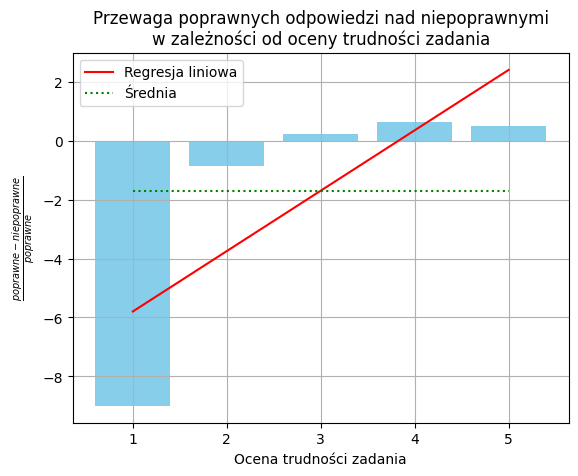

In [38]:
corr_answer_index(contingency_table)

In [39]:
conduct_chi2test(contingency_table, h0, h1, alpha)

Wartość statystyki chi-kwadrat: 14.767061923583663
P-value: 0.005209550099435467
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1:
Istnieje istotna statystycznie zależność między poziomem trudności a poprawnością odpowiedzi.


e) zadania 1a, 1b, 2a, 2b, 3a, 3b

In [40]:
df1a = pd.DataFrame({'poprawnosc': df_answers['1a_corr'], 'trudnosc': df_answers['1a_trud']})
df2a = pd.DataFrame({'poprawnosc': df_answers['2a_corr'], 'trudnosc': df_answers['2a_trud']})
df3a = pd.DataFrame({'poprawnosc': df_answers['3a_corr'], 'trudnosc': df_answers['3a_trud']})

df1b = pd.DataFrame({'poprawnosc': df_answers['1b_corr'], 'trudnosc': df_answers['1b_trud']})
df2b = pd.DataFrame({'poprawnosc': df_answers['2b_corr'], 'trudnosc': df_answers['2b_trud']})
df3b = pd.DataFrame({'poprawnosc': df_answers['3b_corr'], 'trudnosc': df_answers['3b_trud']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]

In [41]:
contingency_tables = []
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(f"{i+1}:")
    tab = create_contingency_table(df)
    contingency_tables.append(tab)
    print(tab)

-------------------------------------
1:
trudnosc    1   2   3  4  5
poprawnosc                 
0           1   2   2  0  0
1           6  12  12  5  1
-------------------------------------
2:
trudnosc     1   2  3  4
poprawnosc              
0            1   2  0  0
1           12  17  8  1
-------------------------------------
3:
trudnosc    1   2  3  4  5
poprawnosc                
0           0   2  4  5  1
1           8  14  7  0  0
-------------------------------------
4:
trudnosc     1   2  3  4  5
poprawnosc                 
0            0   5  3  2  1
1           13  10  4  3  0
-------------------------------------
5:
trudnosc    1  2  3  4  5
poprawnosc               
0           6  9  1  3  0
1           1  4  9  7  1
-------------------------------------
6:
trudnosc    1  2  3  4  5
poprawnosc               
0           4  4  9  3  2
1           0  3  4  9  3


-------------------------------------
1:
Trudność: 1, Wskaźnik: 0.8333333333333334
Trudność: 2, Wskaźnik: 0.8333333333333334
Trudność: 3, Wskaźnik: 0.8333333333333334
Trudność: 4, Wskaźnik: 1.0
Trudność: 5, Wskaźnik: 1.0


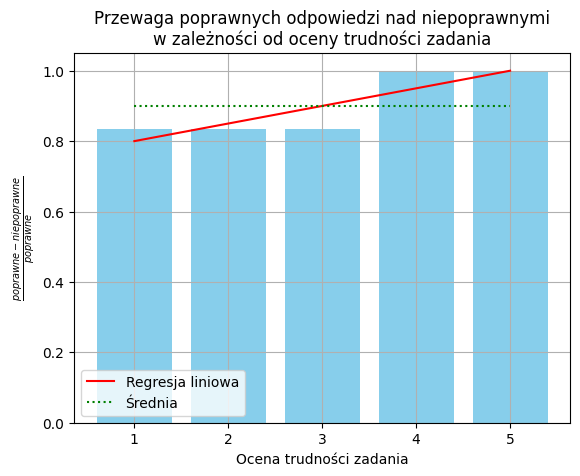

-------------------------------------
2:
Trudność: 1, Wskaźnik: 0.9166666666666666
Trudność: 2, Wskaźnik: 0.8823529411764706
Trudność: 3, Wskaźnik: 1.0
Trudność: 4, Wskaźnik: 1.0


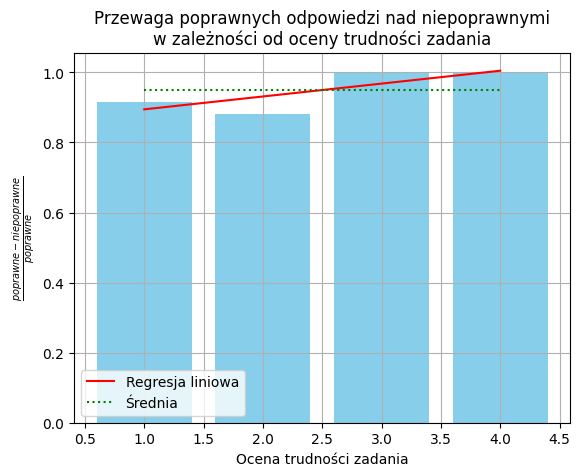

-------------------------------------
3:
Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.8571428571428571
Trudność: 3, Wskaźnik: 0.42857142857142855


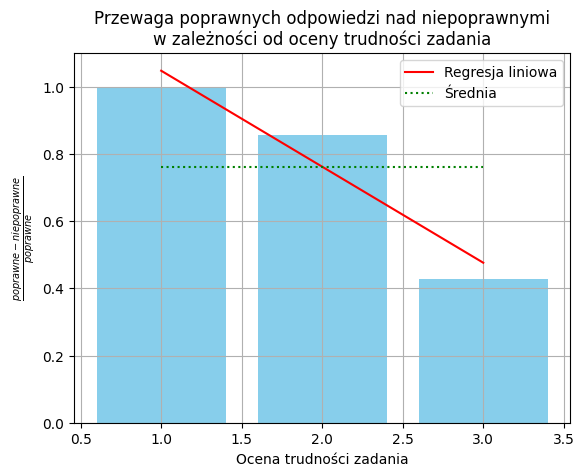

-------------------------------------
4:
Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.5
Trudność: 3, Wskaźnik: 0.25
Trudność: 4, Wskaźnik: 0.3333333333333333


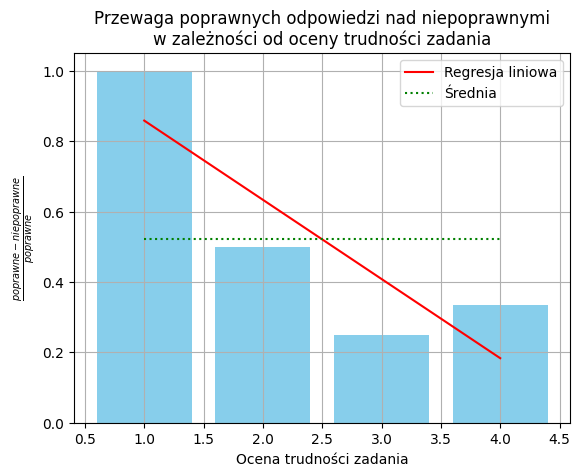

-------------------------------------
5:
Trudność: 1, Wskaźnik: -5.0
Trudność: 2, Wskaźnik: -1.25
Trudność: 3, Wskaźnik: 0.8888888888888888
Trudność: 4, Wskaźnik: 0.5714285714285714
Trudność: 5, Wskaźnik: 1.0


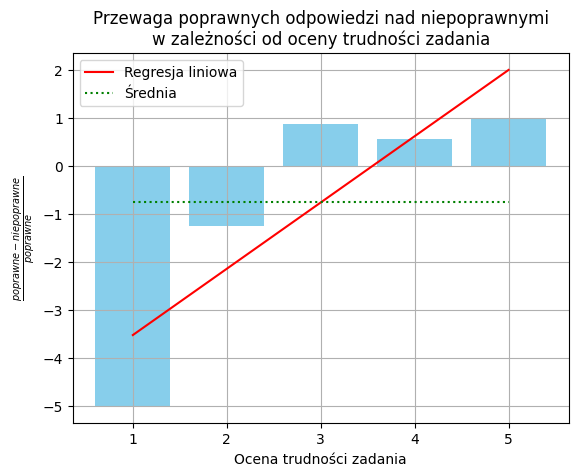

-------------------------------------
6:
Trudność: 2, Wskaźnik: -0.3333333333333333
Trudność: 3, Wskaźnik: -1.25
Trudność: 4, Wskaźnik: 0.6666666666666666
Trudność: 5, Wskaźnik: 0.3333333333333333


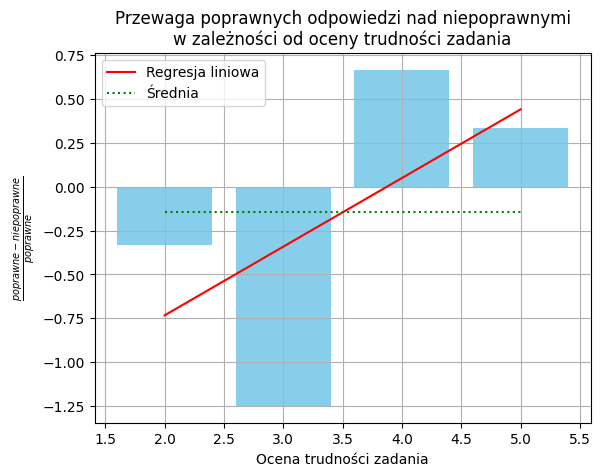

In [42]:
for i, tab in enumerate(contingency_tables):
    print('-------------------------------------')
    print(f"{i+1}:")
    corr_answer_index(tab)

In [43]:
for i, tab in enumerate(contingency_tables):
    print('-------------------------------------')
    print(f"{i+1}:")
    conduct_chi2test(tab, h0, h1, alpha)


-------------------------------------
1:
Wartość statystyki chi-kwadrat: 0.9761904761904759
P-value: 0.9133845441194299
Brak podstaw do odrzucenia H0.
Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.
-------------------------------------
2:
Wartość statystyki chi-kwadrat: 1.00177569429647
P-value: 0.8008222909785573
Brak podstaw do odrzucenia H0.
Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.
-------------------------------------
3:
Wartość statystyki chi-kwadrat: 20.25097962382445
P-value: 0.00044552777968950787
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1:
Istnieje istotna statystycznie zależność między poziomem trudności a poprawnością odpowiedzi.
-------------------------------------
4:
Wartość statystyki chi-kwadrat: 9.175007215007216
P-value: 0.056870927883562815
Brak podstaw do odrzucenia H0.
Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością 

### Podsumowanie:
Istnieje istotna statystycznie zależność między poziomem trudności a poprawnością odpowiedzi na poziomie istotności $\alpha=0.05$ dla:
- grafik 2 (trend: poprawne ocenienie trudności)
- grafik 3 (trend: niedocenienie trudności zadania; oceniane jako łatwiejsze niż faktycznie było (stosunek (poprawnych-niepoprawnych)/poprawnych))
- grafiki 2a (trend: poprawne ocenienie trudności)
- grafiki 3a (trend: niedocenienie trudności zadania)
